In [25]:
#load in libiaries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, labs, geom_boxplot

In [26]:
#load in data and merge
dat1 = pd.read_csv('Pymaceuticals/data/Mouse_metadata.csv')
dat2 = pd.read_csv('Pymaceuticals/data/Study_results.csv')
data_merge = pd.merge(dat1, dat2, on='Mouse ID')
data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
#check data information
data_merge.info()
data_merge.describe()
##display the number of unique mice ID
data_merge['Mouse ID'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [28]:
#check for any Mouse ID with duplicate time point
duplicateMice= data_merge[data_merge.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
data_merge_copy = data_merge.copy()
data_clean =data_merge_copy.drop(duplicateMice.index)

#check clean results
data_clean[data_clean.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [29]:
#check clean data info
data_clean.info()
data_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1883 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1883 non-null   object 
 1   Drug Regimen        1883 non-null   object 
 2   Sex                 1883 non-null   object 
 3   Age_months          1883 non-null   int64  
 4   Weight (g)          1883 non-null   int64  
 5   Timepoint           1883 non-null   int64  
 6   Tumor Volume (mm3)  1883 non-null   float64
 7   Metastatic Sites    1883 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.4+ KB


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1883.00000,1883.000000,1883.000000,1883.000000,1883.000000
mean,12.77111,25.660648,19.622942,50.449310,1.025491
std,7.18380,3.931950,14.090045,8.914637,1.139284
min,1.00000,15.000000,0.000000,22.050126,0.000000
25%,7.00000,25.000000,5.000000,45.000000,0.000000
50%,13.00000,27.000000,20.000000,48.951368,1.000000
75%,20.00000,29.000000,30.000000,56.346321,2.000000
max,24.00000,30.000000,45.000000,78.567014,4.000000


In [30]:
#statistic summary
grouped_data = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Create a DataFrame of summary statistics
summary_stats = pd.DataFrame({
    'Mean': grouped_data.mean(),
    'Median': grouped_data.median(),
    'Variance': grouped_data.var(),
    'Standard Deviation': grouped_data.std(),
    'SEM': grouped_data.sem()  # Standard Error of the Mean
})

# Display the summary statistics DataFrame
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


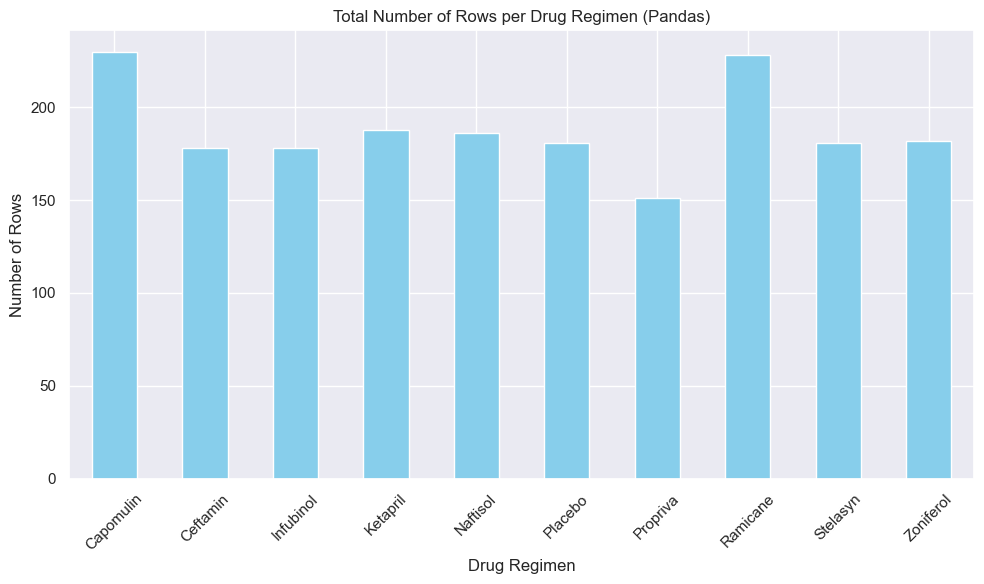

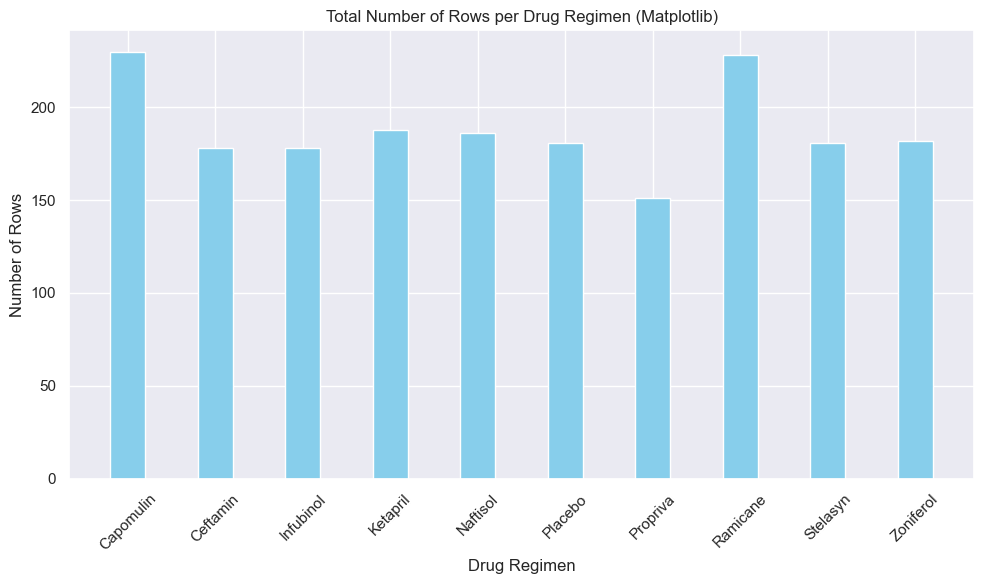

/var/folders/8m/lwz21wkx4mb96m6tpz49_zhc0000gp/T/ipykernel_18697/3170213807.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



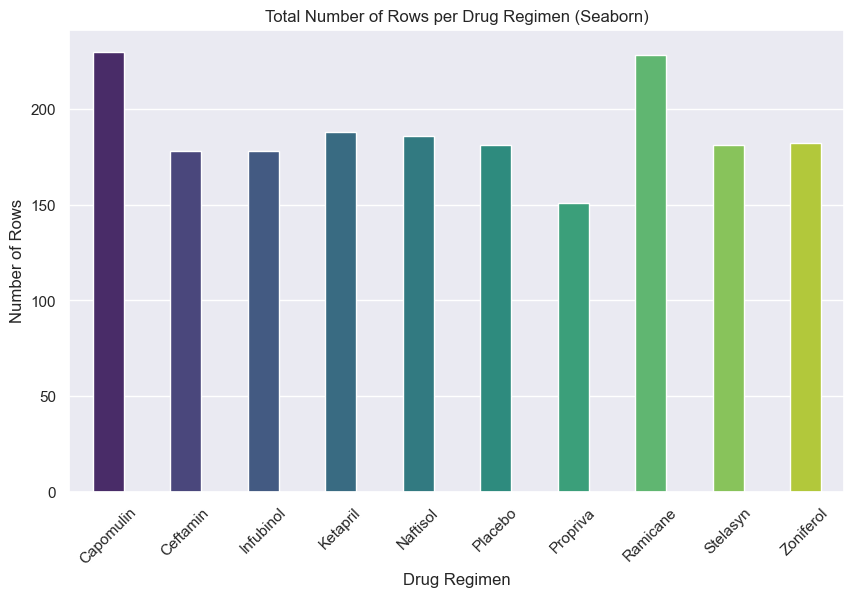

/var/folders/8m/lwz21wkx4mb96m6tpz49_zhc0000gp/T/ipykernel_18697/3170213807.py:43: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


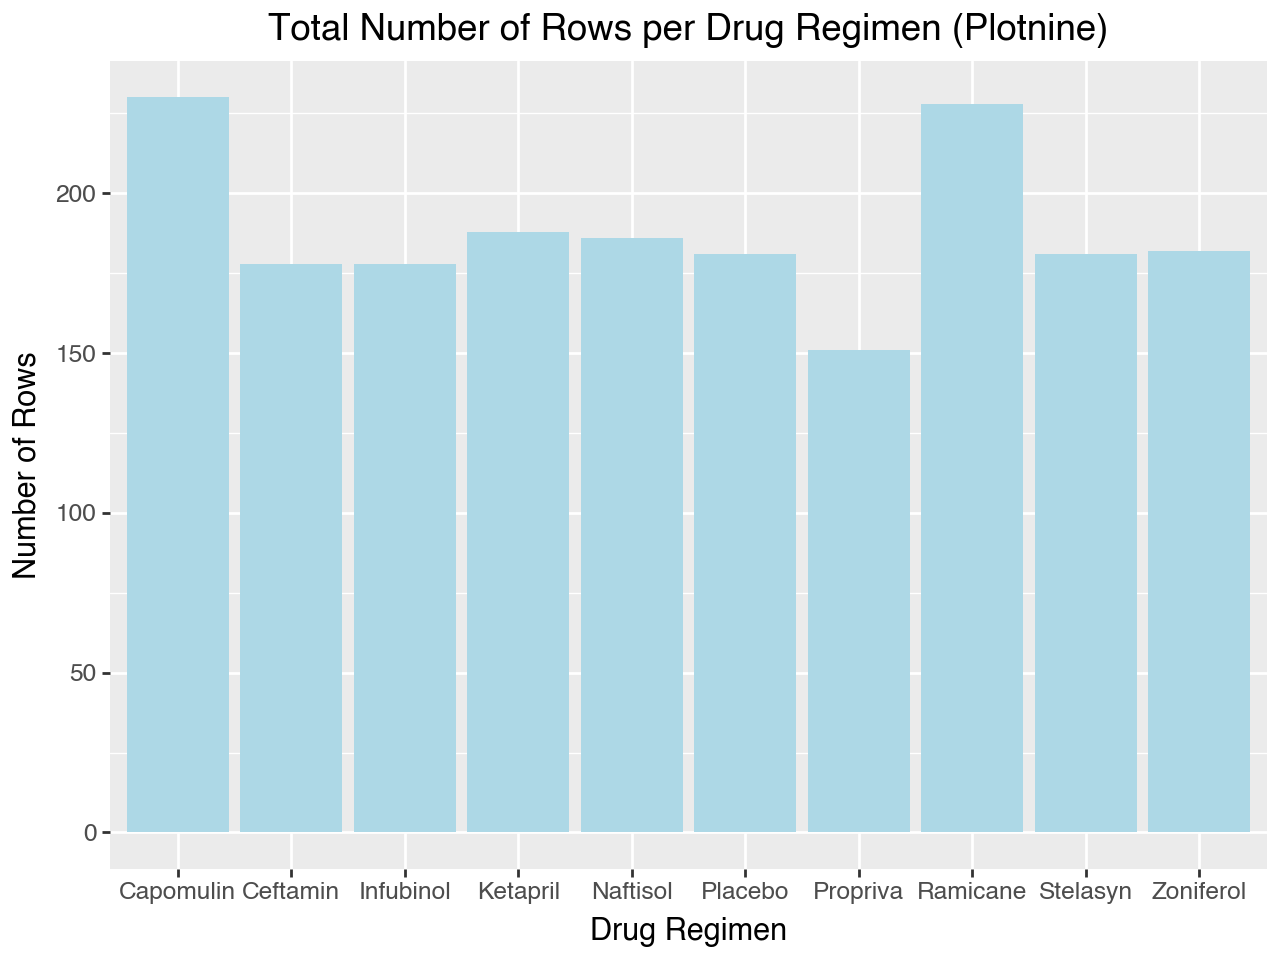

In [31]:
#Create Bar Charts using matplotlib, seaborn, pandas, plotnine
drug_counts = data_clean.groupby('Drug Regimen').count()['Mouse ID']

# Bar Chart using Pandas DataFrame.plot()
drug_counts.plot(kind='bar', color='skyblue',figsize=(10, 6))
plt.title('Total Number of Rows per Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values, color='skyblue', width=0.4)
plt.title('Total Number of Rows per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#using seaborn
# Set the style
sns.set(style='darkgrid')

# Bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_counts.index, 
            y=drug_counts.values, palette='viridis', width=0.4)
plt.title('Total Number of Rows per Drug Regimen (Seaborn)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

#using plotnine(I love GGplot!)
bar_plot = (ggplot(data_clean, aes(x='Drug Regimen')) +
            geom_bar(fill='lightblue') +
            labs(title='Total Number of Rows per Drug Regimen (Plotnine)',
                 x='Drug Regimen',
                 y='Number of Rows'))
print(bar_plot)




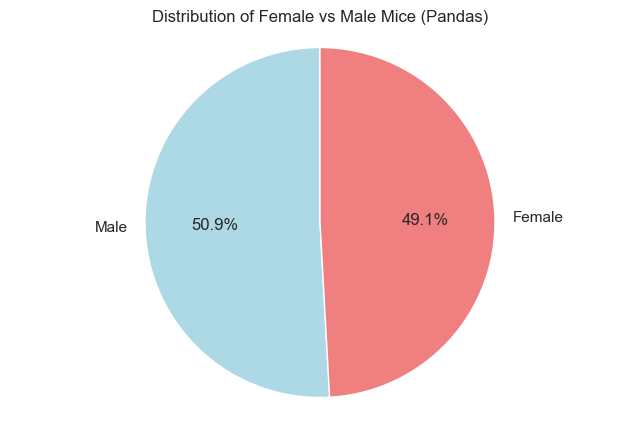

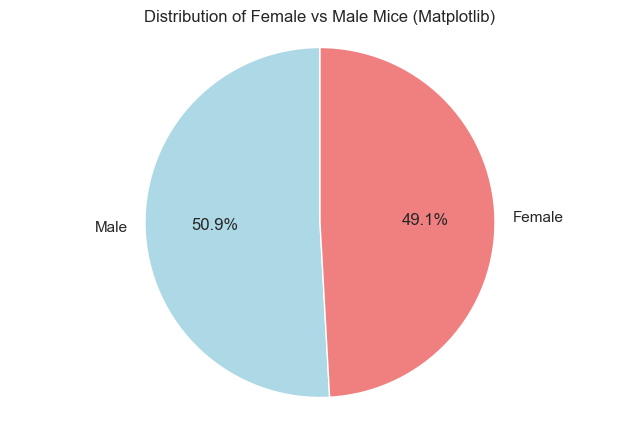

In [32]:
#Create Pie Charts using matplotlib, pandas
# Calculate the count of unique female vs male mice
sex_counts = data_clean['Sex'].value_counts()

# Pie chart using Pandas
plt.figure(figsize=(8, 5))
data_clean['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice (Pandas)')
plt.ylabel('')  # Hide the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart using Matplotlib 
plt.figure(figsize=(8, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice (Matplotlib)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [33]:
#Calculate Quartiles, Find Outliers, and Create a Box Plot

#Create a grouped DataFrame that shows the last (greatest) time point for each mouse
last_timepoint = data_clean.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

#Merge this grouped DataFrame with the original cleaned DataFrame
merged_df = pd.merge(last_timepoint, data_clean, on=['Mouse ID', 'Timepoint'])

#Filter for only the treatments of interest
filtered_data = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

#Create a list of treatment names and an empty dictionary for tumor volumes
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = {treatment: [] for treatment in treatment_list}

#Loop through each drug in the treatment list and collect final tumor volumes
for treatment in treatment_list:
    treatment_data = filtered_data[filtered_data['Drug Regimen'] == treatment]
    final_tumor_volumes[treatment] = treatment_data['Tumor Volume (mm3)'].tolist()

#Calculate quartiles and IQR for each treatment to determine outliers
outlier_info = {}

for treatment in treatment_list:
    data = final_tumor_volumes[treatment]

    # Calculate quartiles and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Determine outlier bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Store outlier information
    outlier_info[treatment] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers": [x for x in data if x < lower_bound or x > upper_bound]
    }

# Print outlier results
for treatment in outlier_info:
    print(f"{treatment} Outliers: {outlier_info[treatment]['outliers']}")

Capomulin Outliers: []
Ramicane Outliers: []
Infubinol Outliers: [36.3213458]
Ceftamin Outliers: []


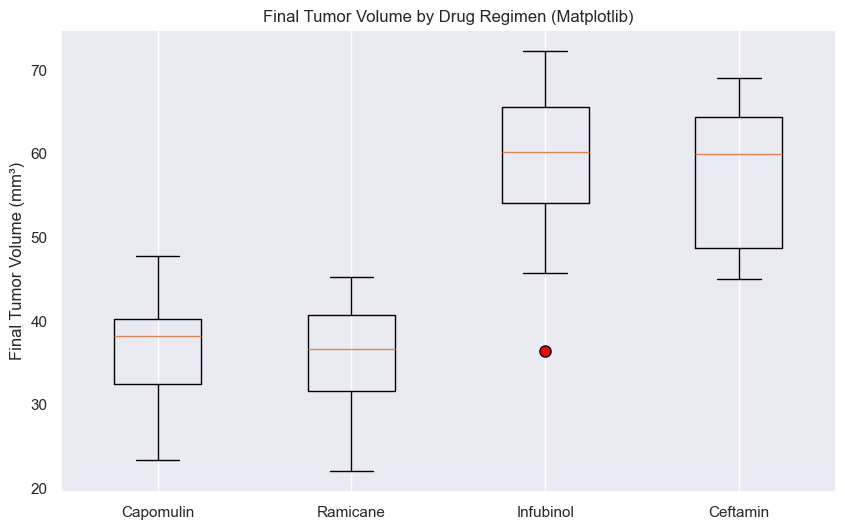

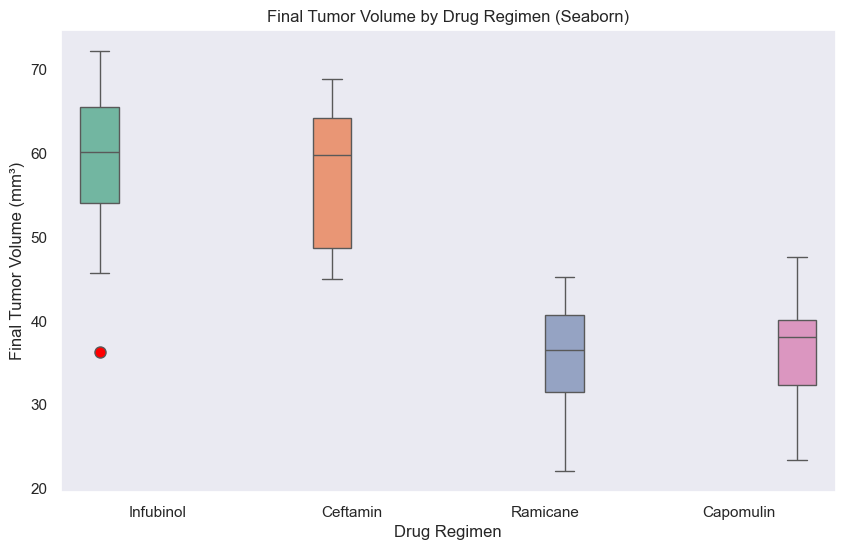

In [34]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot

# Create box plots using matplotlib
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot([filtered_data[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']],
                       labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

plt.title('Final Tumor Volume by Drug Regimen (Matplotlib)')
plt.ylabel('Final Tumor Volume (mm³)')
plt.grid(axis='y')
plt.show()

# Create box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=filtered_data,
            flierprops=dict( marker='o', markerfacecolor='red', markersize=8), palette="Set2",hue='Drug Regimen',legend=False,dodge=True)
plt.title('Final Tumor Volume by Drug Regimen (Seaborn)')
plt.ylabel('Final Tumor Volume (mm³)')
plt.grid(axis='y')
plt.show()


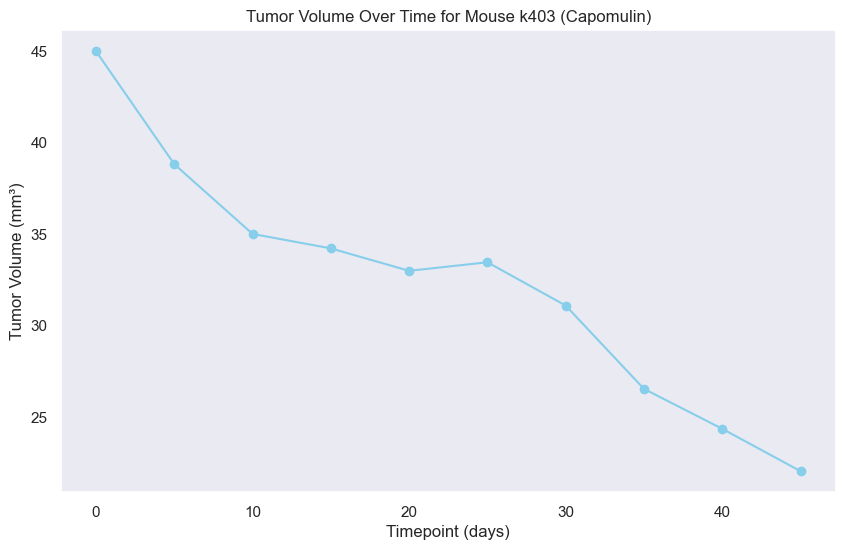

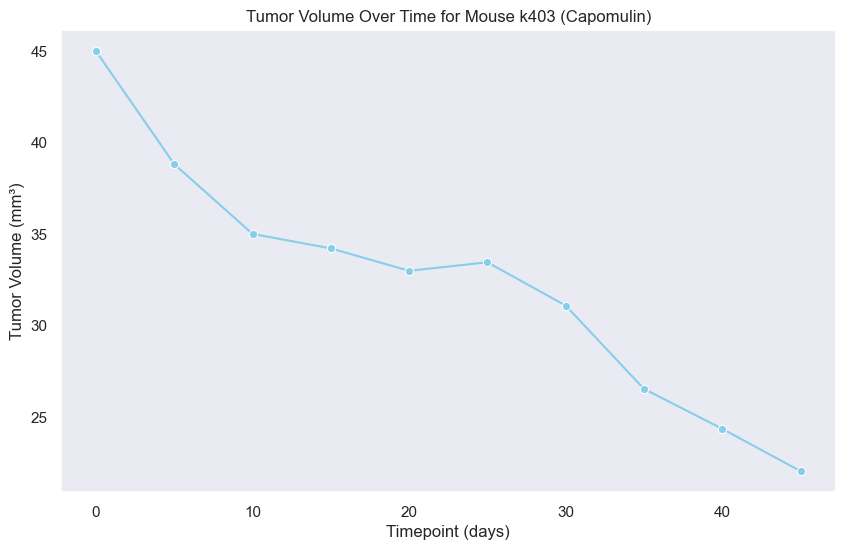

In [35]:
# Create a Line Plot and a Scatter Plot for a single mouse treated with Capomulin  
mouse_data = data_clean[data_clean['Mouse ID'] == 'k403']

# Generate a line plot of tumor volume versus time point for that mouse using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='skyblue')
plt.title(f'Tumor Volume Over Time for Mouse k403 (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.grid()
plt.show()

#using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=mouse_data, x='Timepoint', y='Tumor Volume (mm3)', marker='o', color='skyblue')
plt.title(f'Tumor Volume Over Time for Mouse k403 (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.grid()
plt.show()


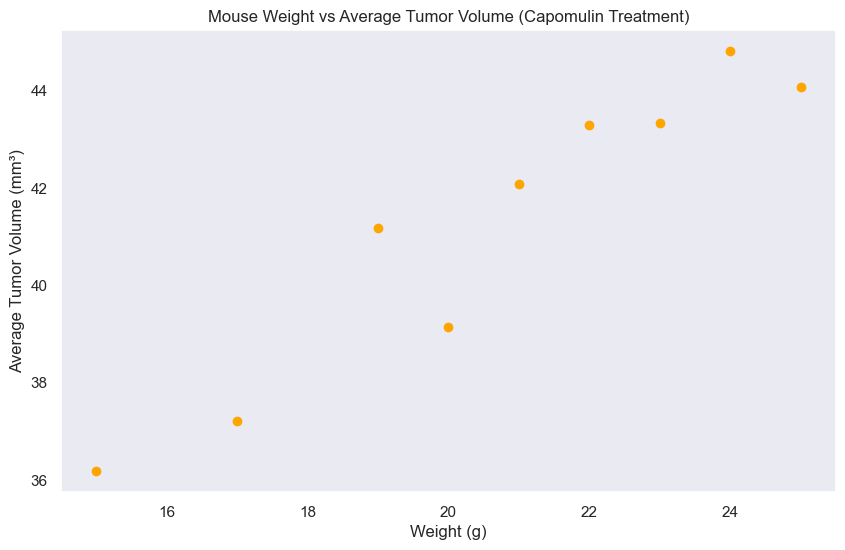

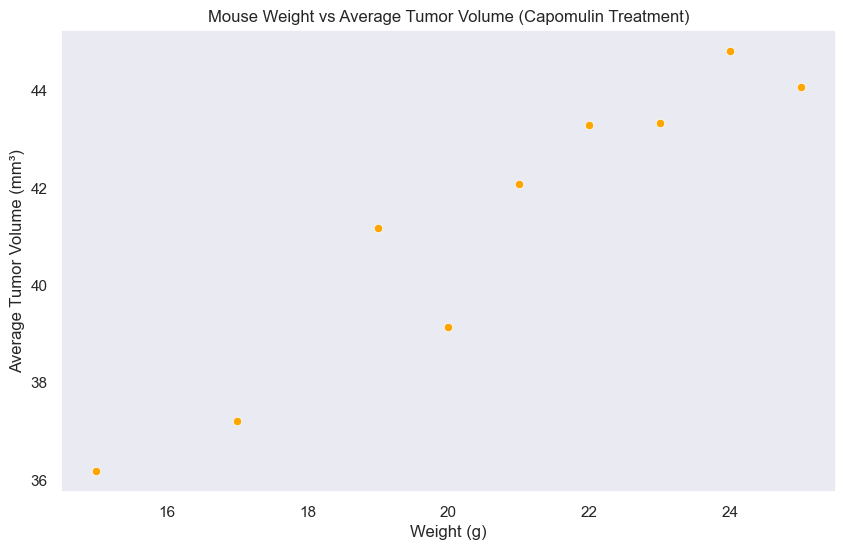

In [36]:
#Calculate average tumor volume for the entire Capomulin treatment regimen and plot with matplotlib and seaborn
capomulin_data = data_clean[data_clean['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

#using matplotlib
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='orange')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.grid()
plt.show()

#using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_tumor_volume, x='Weight (g)', y='Tumor Volume (mm3)', color='orange')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.grid()
plt.show()

In [37]:
#Calculate Correlation and Regression

import scipy.stats as st
correlation = st.pearsonr(avg_tumor_volume['Weight (g)'],avg_tumor_volume['Tumor Volume (mm3)'])
correlation

PearsonRResult(statistic=0.9505243961855266, pvalue=8.449451040646362e-05)

The r-squared is: 0.9034966277438602


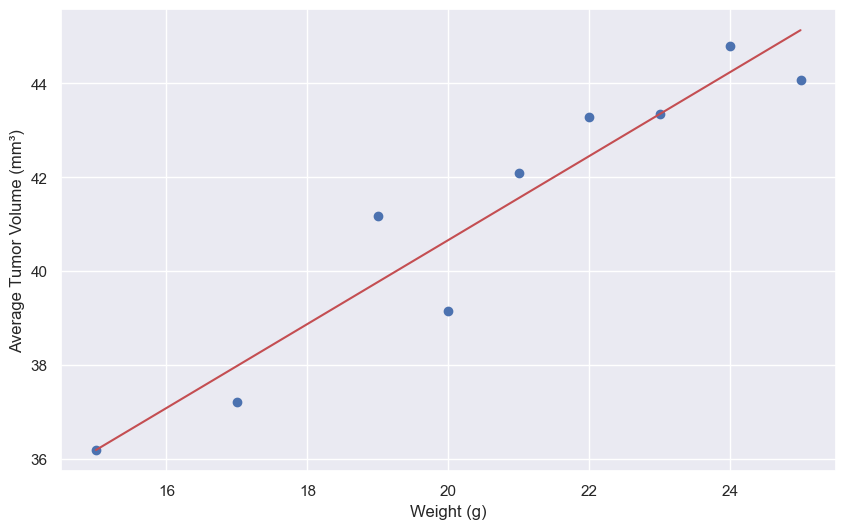

In [38]:
#Plot the linear regression model on top of the previous scatter plot
from scipy.stats import linregress

# Print out the r-squared value along with the plot.
plt.figure(figsize=(10, 6))
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
print(f"The r-squared is: {rvalue**2}")
plt.show()